In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset/data/data_by_year.csv
/kaggle/input/spotify-dataset/data/data_by_genres.csv
/kaggle/input/spotify-dataset/data/data_w_genres.csv
/kaggle/input/spotify-dataset/data/data_by_artist.csv
/kaggle/input/spotify-dataset/data/data.csv


# Imports

In [44]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [45]:
data = pd.read_csv("../input/spotify-dataset/data/data.csv")

In [46]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


# Data Analysis

## Data exploring

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [48]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [49]:
numerical_data = data[['valence', 'year', 'acousticness',  'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity', 
       'speechiness', 'tempo']]
numerical_data.head()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


## Correlation Matrix

In [50]:
data_corr = numerical_data.corr()
data_corr

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714
loudness,0.313512,0.487697,-0.561696,0.285057,-0.003037,0.782362,-0.408611,0.017385,0.056422,1.000000,-0.010727,0.457051,-0.139296,0.209774


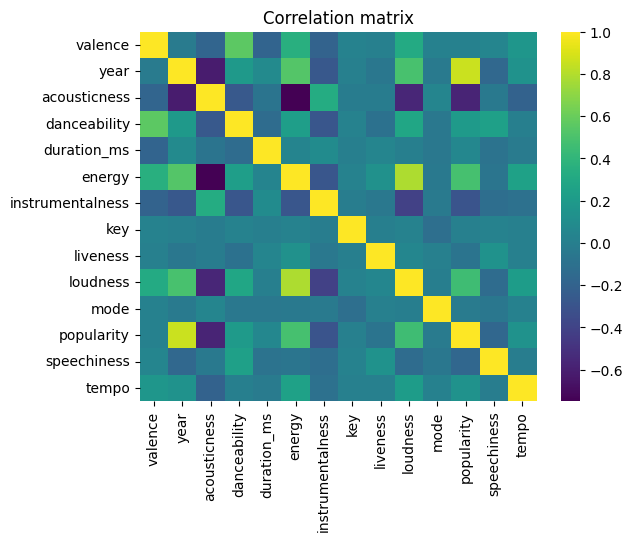

In [51]:
sns.heatmap(data_corr , cmap = 'viridis')
plt.title('Correlation matrix')
plt.show()

## Popularity by track duration

<Axes: xlabel='duration_ms', ylabel='popularity'>

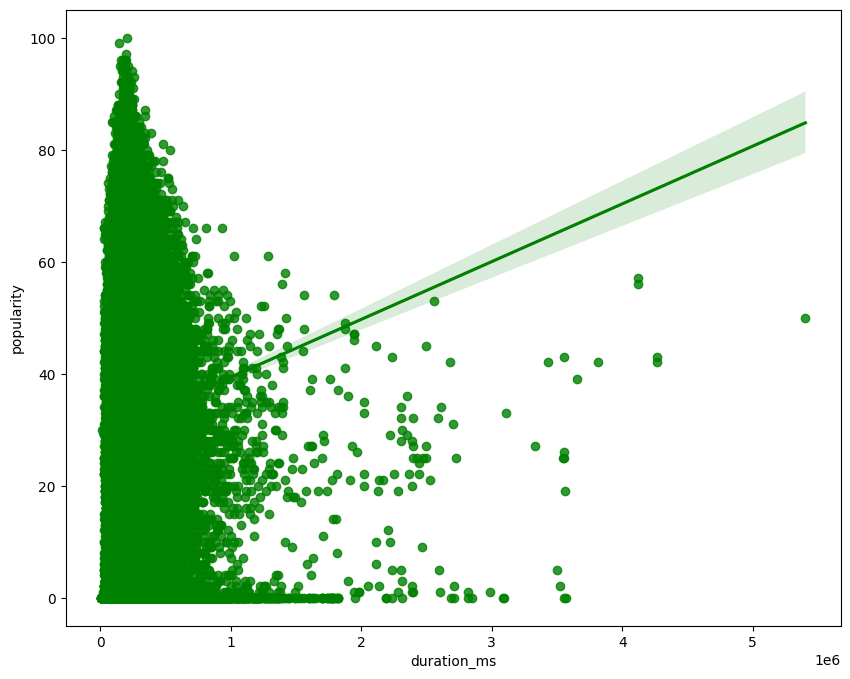

In [52]:
x = data['duration_ms']
y = data['popularity']
plt.figure(figsize=(10,8))
sns.regplot(x=x, y=y,color="green", truncate=True)

# features selection

we will choose numerical features

In [53]:
# Selecting relevant features for recommendation
features = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

# Replace missing values with 0
data[features] = data[features].fillna(0)

In [54]:
data[features]

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.0594,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,0.0366,80.954
1,0.9630,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,0.4150,60.936
2,0.0394,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,0.0339,110.339
3,0.1650,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,0.0354,100.109
4,0.2530,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,0.0881,105.029
170649,0.7340,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,0.0605,137.936
170650,0.6370,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,0.0809,91.688
170651,0.1950,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,0.3080,75.055


# Normalizing data

In [55]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
data[features] = scaler.fit_transform(data[features])

In [56]:
data[features]

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,-1.782825,1.276187,-1.467013,4.763146,-1.013988,2.268102,2.626719,-1.514237,-0.379706,-1.169307
1,1.650688,0.611347,1.598779,-0.399747,-0.528270,-0.532771,-0.262229,-0.170766,1.945481,-1.821180
2,-1.858821,1.220340,-1.188820,2.133824,-1.182122,2.379754,-0.599749,-0.593551,-0.396297,-0.212404
3,-1.381564,1.236296,-1.489722,-0.166101,-0.647832,-0.532682,1.002043,0.377680,-0.387080,-0.545537
4,-1.047180,1.209703,-0.677855,-0.509485,-1.081242,-0.532765,0.132499,0.240788,-0.371104,-0.494867
...,...,...,...,...,...,...,...,...,...,...
170648,0.301754,-1.110321,1.411425,0.561107,1.216579,-0.531849,-0.707298,1.362950,-0.063250,-0.385320
170649,0.780531,-0.787475,1.019685,-0.636660,1.011083,-0.532771,-0.599749,0.956136,-0.232846,0.686274
170650,0.411949,-1.066708,0.548461,-0.155952,1.403394,-0.532743,0.298399,1.621992,-0.107492,-0.819761
170651,-1.267570,-1.308762,0.758525,0.842058,0.525365,-0.532746,2.500864,0.755887,1.287989,-1.361404


# Fitting K-means to data

In [57]:
# Define the number of clusters
n_clusters = 20

# Initialize K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit K-means to the data
data['cluster'] = kmeans.fit_predict(data[features])


In [58]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,-1.782825,1921,1.276187,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",-1.467013,4.763146,-1.013988,0,4BJqT0PrAfrxzMOxytFOIz,2.268102,10,2.626719,-1.514237,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,-0.379706,-1.169307,13
1,1.650688,1921,0.611347,['Dennis Day'],1.598779,-0.399747,-0.528270,0,7xPhfUan2yNtyFG0cUWkt8,-0.532771,7,-0.262229,-0.170766,1,Clancy Lowered the Boom,5,1921,1.945481,-1.821180,4
2,-1.858821,1921,1.220340,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,-1.188820,2.133824,-1.182122,0,1o6I8BglA6ylDMrIELygv1,2.379754,3,-0.599749,-0.593551,1,Gati Bali,5,1921,-0.396297,-0.212404,15
3,-1.381564,1921,1.236296,['Frank Parker'],-1.489722,-0.166101,-0.647832,0,3ftBPsC5vPBKxYSee08FDH,-0.532682,5,1.002043,0.377680,1,Danny Boy,3,1921,-0.387080,-0.545537,0
4,-1.047180,1921,1.209703,['Phil Regan'],-0.677855,-0.509485,-1.081242,0,4d6HGyGT8e121BsdKmw9v6,-0.532765,3,0.132499,0.240788,1,When Irish Eyes Are Smiling,2,1921,-0.371104,-0.494867,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.301754,2020,-1.110321,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",1.411425,0.561107,1.216579,0,0KkIkfsLEJbrcIhYsCL7L5,-0.531849,7,-0.707298,1.362950,1,China,72,2020-05-29,-0.063250,-0.385320,10
170649,0.780531,2020,-0.787475,['Ashnikko'],1.019685,-0.636660,1.011083,0,0OStKKAuXlxA0fMH54Qs6E,-0.532771,7,-0.599749,0.956136,1,Halloweenie III: Seven Days,68,2020-10-23,-0.232846,0.686274,10
170650,0.411949,2020,-1.066708,['MAMAMOO'],0.548461,-0.155952,1.403394,0,4BZXVFYCb76Q0Klojq4piV,-0.532743,4,0.298399,1.621992,0,AYA,76,2020-11-03,-0.107492,-0.819761,10
170651,-1.267570,2020,-1.308762,['Eminem'],0.758525,0.842058,0.525365,1,5SiZJoLXp3WOl3J4C8IK0d,-0.532746,2,2.500864,0.755887,1,Darkness,70,2020-01-17,1.287989,-1.361404,12


# Music recommendation function

In [59]:
def get_kmeans_recommendations(song_name, data, top_n=10):
    # Find the cluster of the given song
    song_cluster = data.loc[data['name'] == song_name, 'cluster'].values
    
    if len(song_cluster) == 0:
        print(f"Song '{song_name}' not found in the dataset.")
        return []
    
    song_cluster = song_cluster[0]
    
    # Get the songs from the same cluster
    cluster_songs = data[data['cluster'] == song_cluster]
    
    # Exclude the input song itself
    cluster_songs = cluster_songs[cluster_songs['name'] != song_name]
    
    # Get the top N recommendations
    recommendations = cluster_songs.head(top_n)
    
    return recommendations['name'].tolist()


# Recommendation example

In [60]:
# Example usage
song_name = 'Clancy Lowered the Boom'
recommended_songs = get_kmeans_recommendations(song_name, data, top_n=10)
print(recommended_songs)


['Kasr-ı Gülşen', 'Une Canne Et Des Gants', 'Şu Boğaz Harbi Nedir', "It's the Same Old Shillelegh", "St. Patrick's Day Parade", 'Beyaz Entarisiyle Kar Gibi Kız', "C'est La Mode Et Voila Tout", "Elle Vendait Des P'tits Gateaux", 'A Monday Date', 'T.N.T.']
